_________________________


In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet
import statsmodels.api as sm

c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Leer y transformar archivo base

In [2]:
agg_diario = pd.read_csv('data/agg_day.csv')

In [3]:
agg_diario

,fecha,entidad,errores
0,2025-01-01,BancoMinería A,243
1,2025-01-01,BancoLogísticC,9
2,2025-01-01,BancoPromocioE,115
3,2025-01-01,BancoTransporF,8
4,2025-01-01,BancoRivero yG,4454
...,...,...,...
42808,2025-10-31,BancoCerdán yā,33
42809,2025-10-31,BancoTecnologă,20
42810,2025-10-31,BancoConstrucĄ,1
42811,2025-10-31,BancoRomero &Ĉ,2


In [4]:
agg_diario['fecha'] = pd.to_datetime(agg_diario['fecha'])

In [5]:
agg_diario['entidad'].nunique()

207

_____________________________

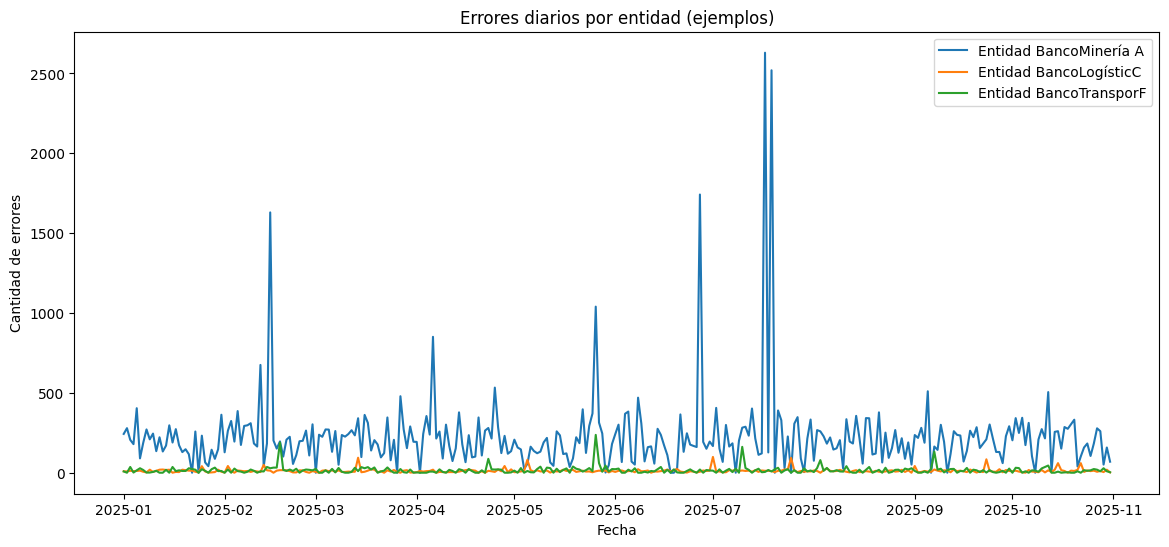

In [ ]:

# Elegir entidades a analizar si cumplen con tendencias de tiempo
entidades_ejemplo = ['BancoMinería A', 'BancoLogísticC', 'BancoTransporF']

plt.figure(figsize=(14,6))
for e in entidades_ejemplo:
    df_e = agg_diario[agg_diario['entidad'] == e]
    plt.plot(df_e['fecha'], df_e['errores'], label=f'Entidad {e}')

plt.title('Errores diarios por entidad (ejemplos)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de errores')
plt.legend()
plt.show()


In [7]:


# Pivotar para tener fechas como índice y entidades como columnas
heatmap_df = agg_diario.pivot(index='fecha', columns='entidad', values='errores').fillna(0)

# Ver las primeras filas
heatmap_df.head()


entidad,BancoAlimentaÉ,BancoAmérica õ,BancoAristidej,BancoAtienza q,BancoBanca PrI,BancoBanca Pru,BancoBanca PrÏ,BancoBanca Pré,BancoBanca Prð,BancoBanco Al¡,...,BancoTransporë,BancoTransporČ,BancoTransporĎ,BancoUgarte yù,BancoValero Cd,BancoValero y,BancoVera y M,BancoVillalba¿,BancoVirgilioč,BancoZabala ys
fecha,,,,,,,,,,,,,,,,,,,,,
2025-01-01,0.0,0.0,26.0,8.0,0.0,0.0,0.0,0.0,0.0,26.0,...,0.0,0.0,0.0,0.0,23.0,0.0,52.0,17.0,0.0,0.0
2025-01-02,35.0,0.0,26.0,1.0,10.0,4.0,0.0,4.0,0.0,8.0,...,0.0,0.0,0.0,0.0,4.0,1.0,29.0,4.0,0.0,15.0
2025-01-03,302.0,0.0,42.0,2.0,17.0,3.0,7.0,3.0,0.0,16.0,...,0.0,0.0,0.0,0.0,13.0,1.0,45.0,18.0,0.0,11.0
2025-01-04,37.0,0.0,13.0,11.0,13.0,4.0,6.0,26.0,0.0,51.0,...,0.0,0.0,0.0,0.0,25.0,1.0,50.0,7.0,0.0,5.0
2025-01-05,13.0,0.0,32.0,13.0,0.0,1.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,2.0,53.0,13.0,0.0,17.0


c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 134 (\x86) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Gly

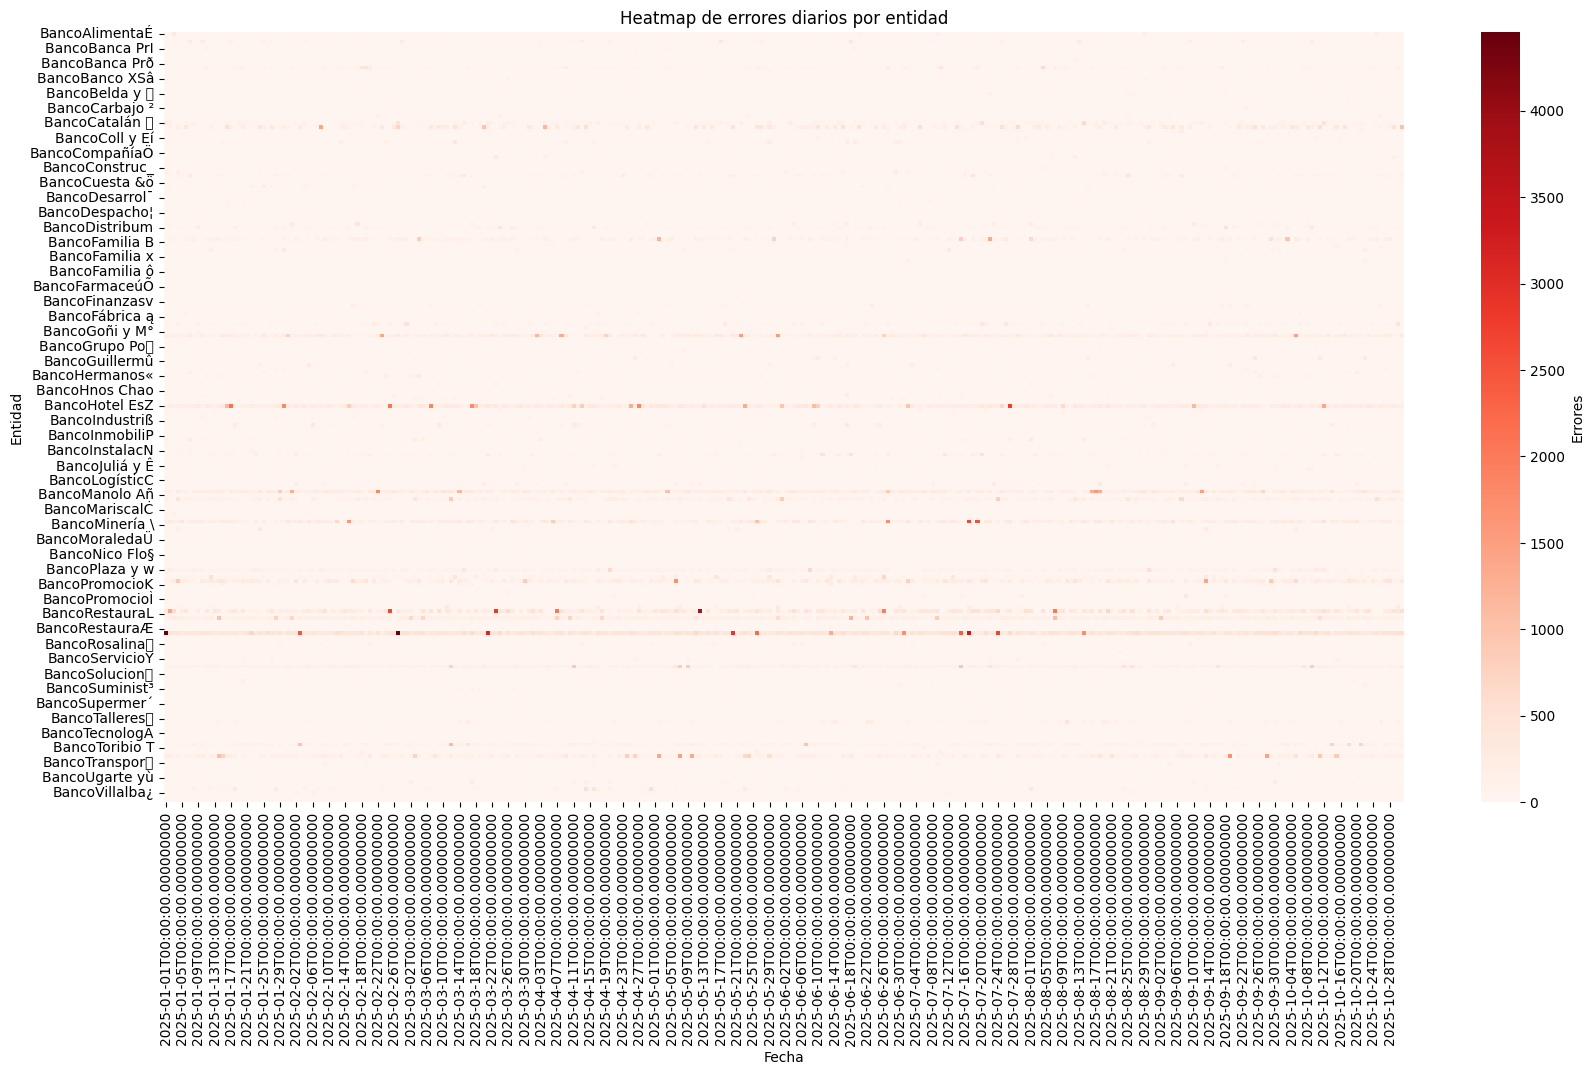

In [ ]:
# Gráfico de mapa de calor para observar comportamiento de la data
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_df.T, cmap='Reds', cbar_kws={'label': 'Errores'})
plt.title('Heatmap de errores diarios por entidad')
plt.xlabel('Fecha')
plt.ylabel('Entidad')
plt.show()


In [9]:
# Elegimos una entidad de ejemplo
entidad_ejemplo = 'BancoMinería A'

ts_entidad = agg_diario[agg_diario['entidad'] == entidad_ejemplo].copy()
ts_entidad.set_index('fecha', inplace=True)

# Ver la serie de tiempo
ts_entidad


,entidad,errores
fecha,,
2025-01-01,BancoMinería A,243
2025-01-02,BancoMinería A,279
2025-01-03,BancoMinería A,206
2025-01-04,BancoMinería A,179
2025-01-05,BancoMinería A,404
...,...,...
2025-10-27,BancoMinería A,278
2025-10-28,BancoMinería A,260
2025-10-29,BancoMinería A,51


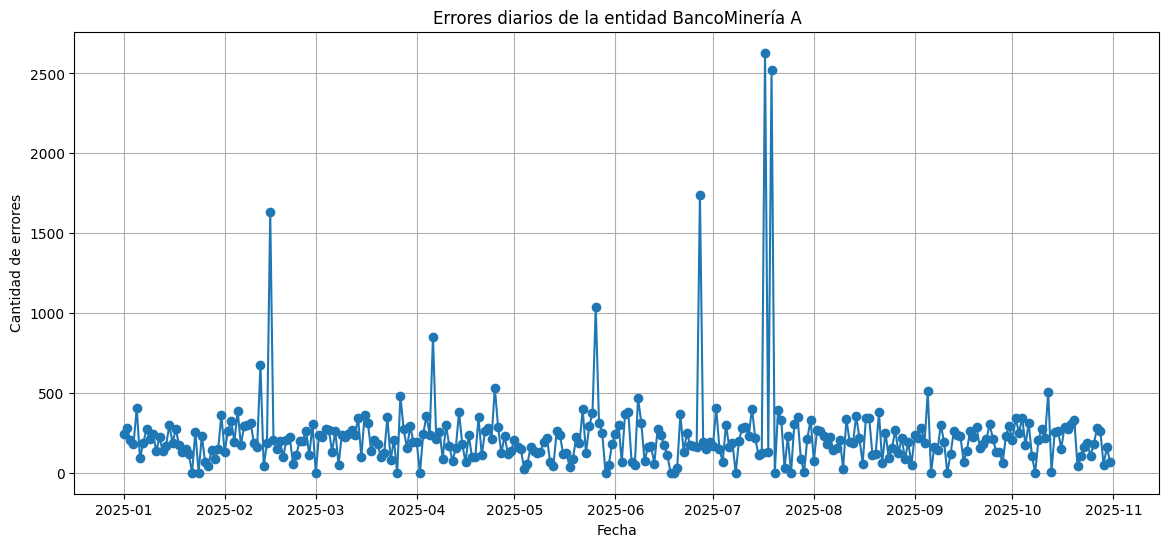

In [ ]:
# Graficar la serie de tiempo
plt.figure(figsize=(14,6))     
plt.plot(ts_entidad.index, ts_entidad['errores'], marker='o')
plt.title(f'Errores diarios de la entidad {entidad_ejemplo}')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de errores')
plt.grid(True)
plt.show()


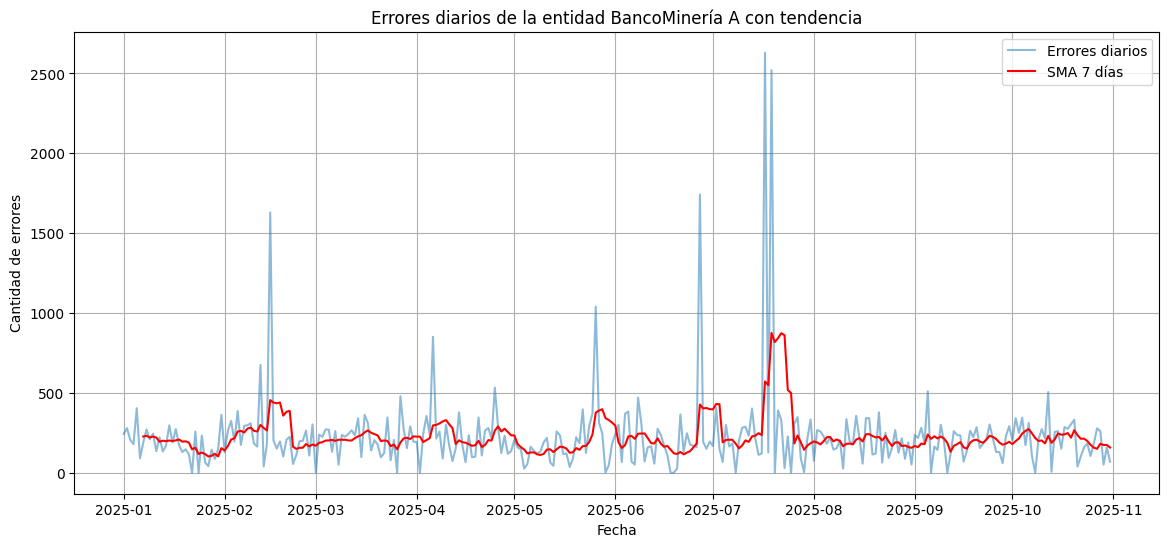

In [ ]:
# Generar en el gráfico de serie de tiempo una tendencia con media móvil simple con ventana de 7 días, para suavizar
ts_entidad['errores_sma7'] = ts_entidad['errores'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(ts_entidad.index, ts_entidad['errores'], alpha=0.5, label='Errores diarios')
plt.plot(ts_entidad.index, ts_entidad['errores_sma7'], color='red', label='SMA 7 días')
plt.title(f'Errores diarios de la entidad {entidad_ejemplo} con tendencia')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de errores')
plt.legend()
plt.grid(True)
plt.show()


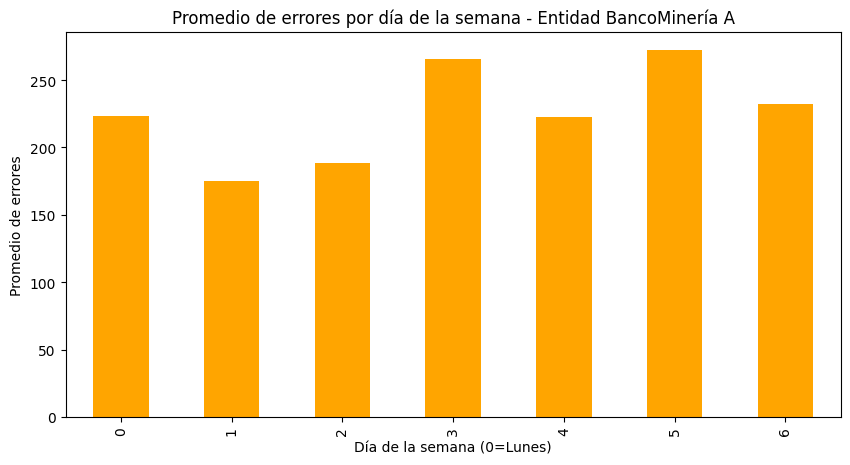

In [ ]:
# Patrones de errores por día de la semana
ts_entidad = agg_diario[agg_diario['entidad'] == entidad_ejemplo].copy()
ts_entidad['fecha'] = pd.to_datetime(ts_entidad['fecha'])
ts_entidad.set_index('fecha', inplace=True)


ts_entidad['dia_semana'] = ts_entidad.index.dayofweek  # 0=Lunes, 6=Domingo
errores_por_dia = ts_entidad.groupby('dia_semana')['errores'].mean()

plt.figure(figsize=(10,5))
errores_por_dia.plot(kind='bar', color='orange')
plt.title(f'Promedio de errores por día de la semana - Entidad {entidad_ejemplo}')
plt.xlabel('Día de la semana (0=Lunes)')
plt.ylabel('Promedio de errores')
plt.show()


#### Preparación para modelo prophet y SARIMA

In [13]:

entidad_ejemplo = 'BancoMinería A'
ts = agg_diario[agg_diario['entidad'] == entidad_ejemplo].copy()

# Preparar formato para Prophet
ts_prophet = ts[['fecha', 'errores']].rename(columns={'fecha': 'ds', 'errores': 'y'})
ts_prophet = ts_prophet.sort_values('ds')


#### Modelo prophet

20:52:38 - cmdstanpy - INFO - Chain [1] start processing
20:52:38 - cmdstanpy - INFO - Chain [1] done processing


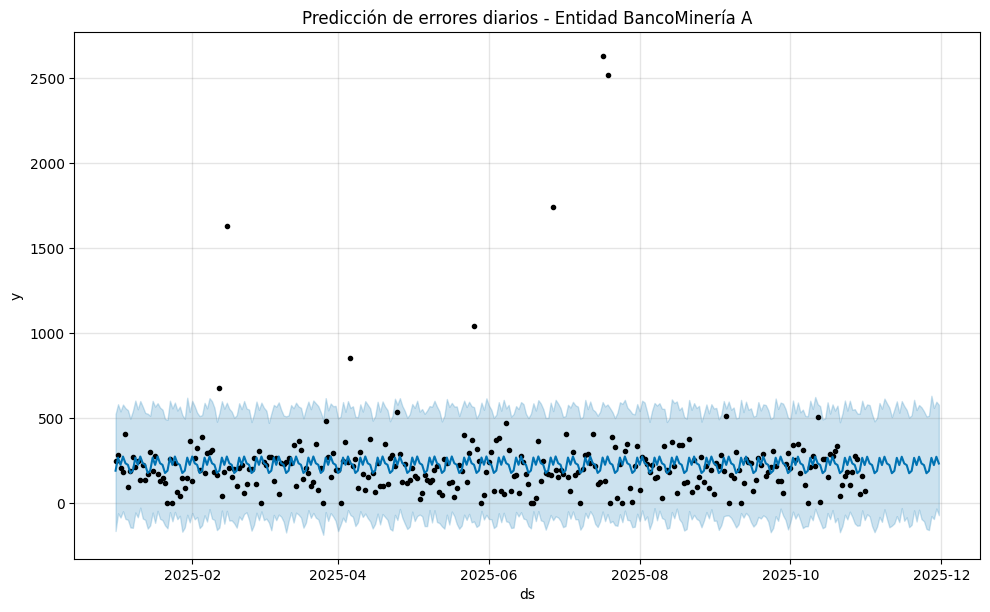

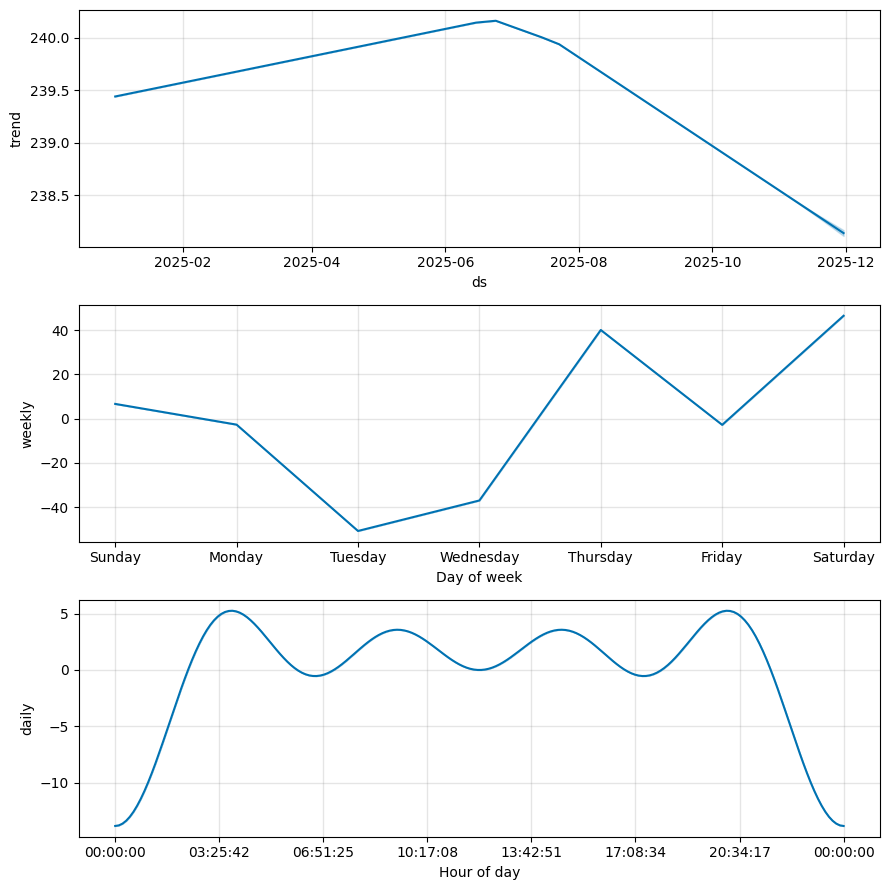

In [14]:
# Crear el modelo
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=True)
model.fit(ts_prophet)

# Crear dataframe para predicción (ej. 30 días futuros)
future = model.make_future_dataframe(periods=30)

# Hacer predicción
forecast = model.predict(future)

# Visualizar
model.plot(forecast)
plt.title(f'Predicción de errores diarios - Entidad {entidad_ejemplo}')
plt.show()

# Opcional: gráfica de componentes (tendencia, semanal)
model.plot_components(forecast)
plt.show()


c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\boda1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

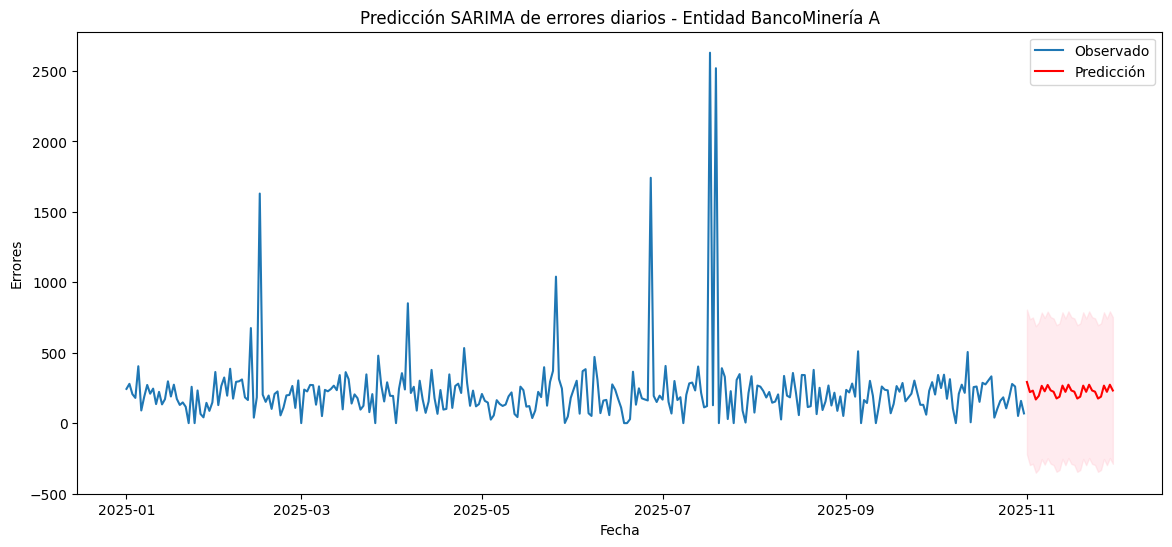

In [15]:


# Ajustar SARIMA (p,d,q)x(P,D,Q,s)
# Aquí s=7 para capturar estacionalidad semanal
sarima_model = sm.tsa.statespace.SARIMAX(ts['errores'],
                                         order=(1,0,1),
                                         seasonal_order=(1,1,1,7),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Hacer predicción de los próximos 30 días
pred = sarima_result.get_forecast(steps=30)
pred_ci = pred.conf_int()

# Graficar
plt.figure(figsize=(14,6))
plt.plot(ts['fecha'], ts['errores'], label='Observado')
plt.plot(pd.date_range(ts['fecha'].iloc[-1]+pd.Timedelta(days=1), periods=30),
         pred.predicted_mean, label='Predicción', color='red')
plt.fill_between(pd.date_range(ts['fecha'].iloc[-1]+pd.Timedelta(days=1), periods=30),
                 pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title(f'Predicción SARIMA de errores diarios - Entidad {entidad_ejemplo}')
plt.xlabel('Fecha')
plt.ylabel('Errores')
plt.legend()
plt.show()


#### Predicciones Prophet y SARIMA para entidades puntuales

20:52:40 - cmdstanpy - INFO - Chain [1] start processing
20:52:40 - cmdstanpy - INFO - Chain [1] done processing



=== Procesando entidad BancoMinería A ===
Prophet:


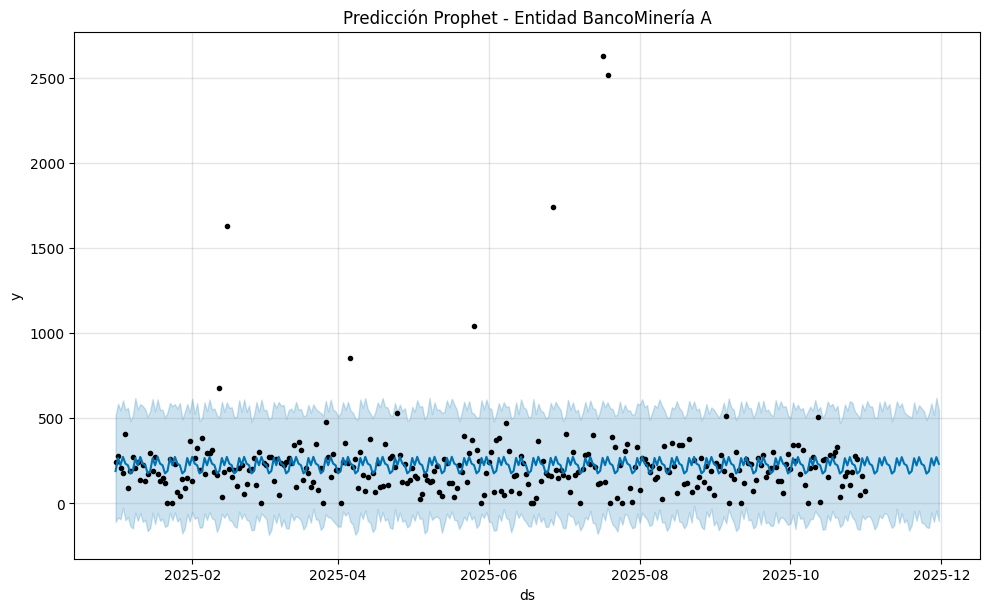

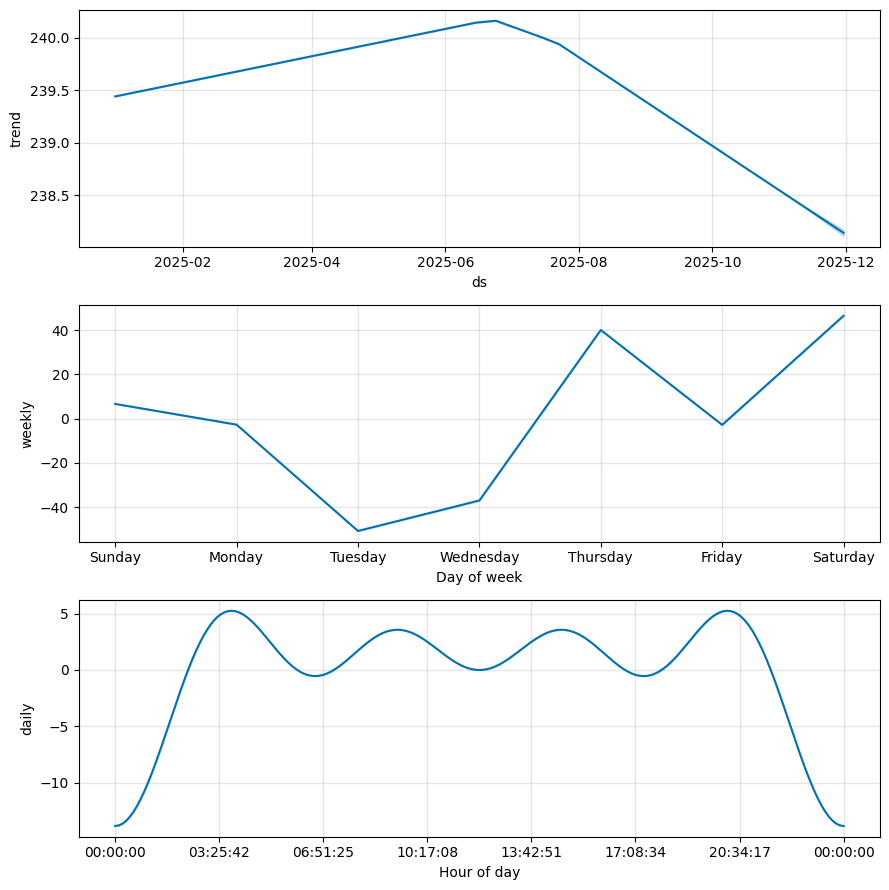

SARIMA:


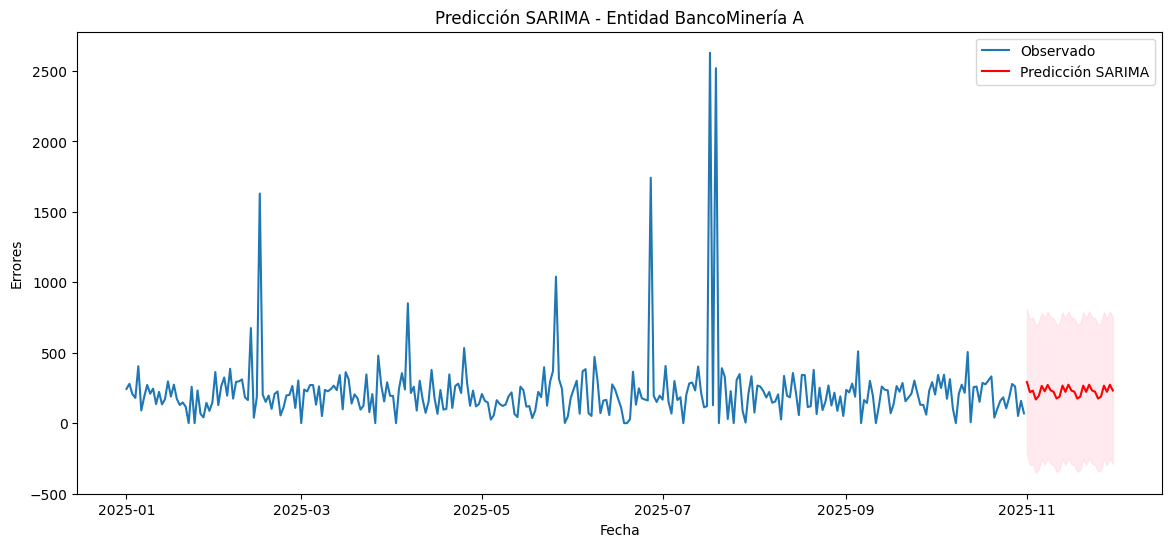

20:52:41 - cmdstanpy - INFO - Chain [1] start processing
20:52:41 - cmdstanpy - INFO - Chain [1] done processing



=== Procesando entidad BancoLogísticC ===
Prophet:


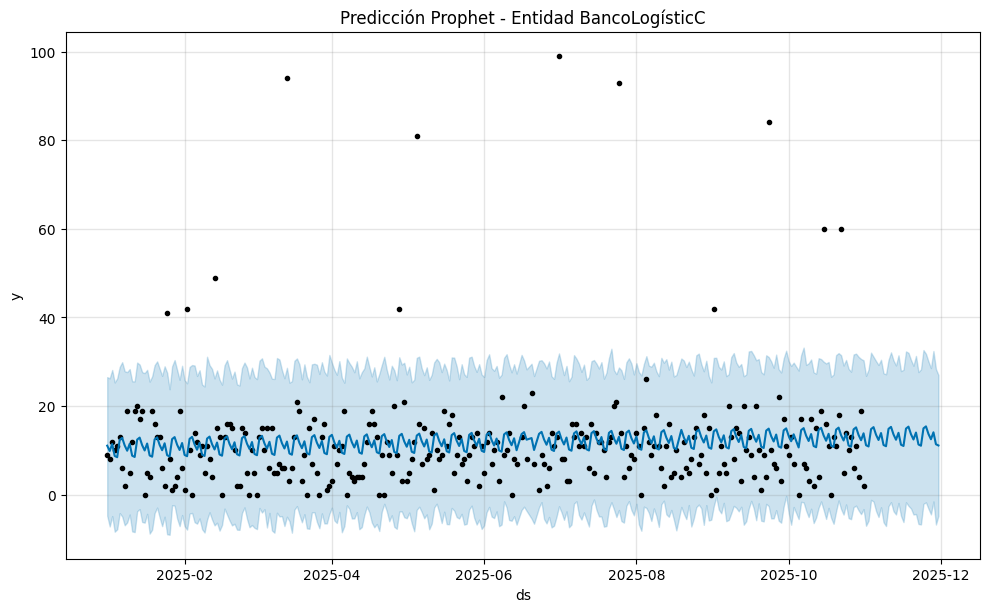

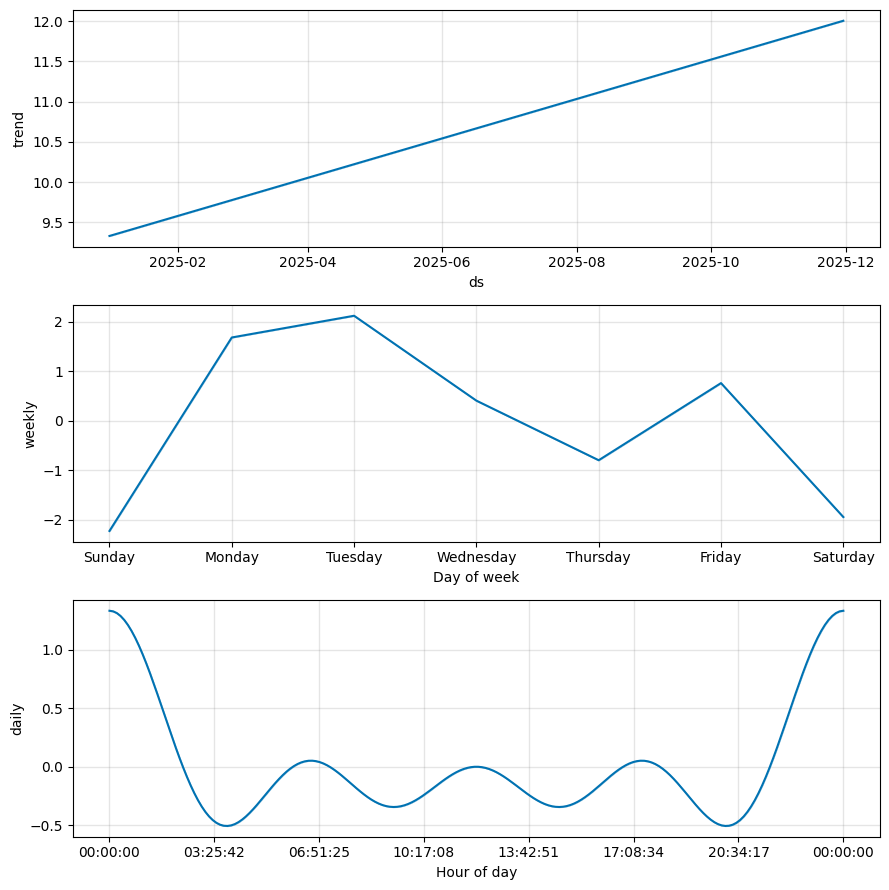

SARIMA:


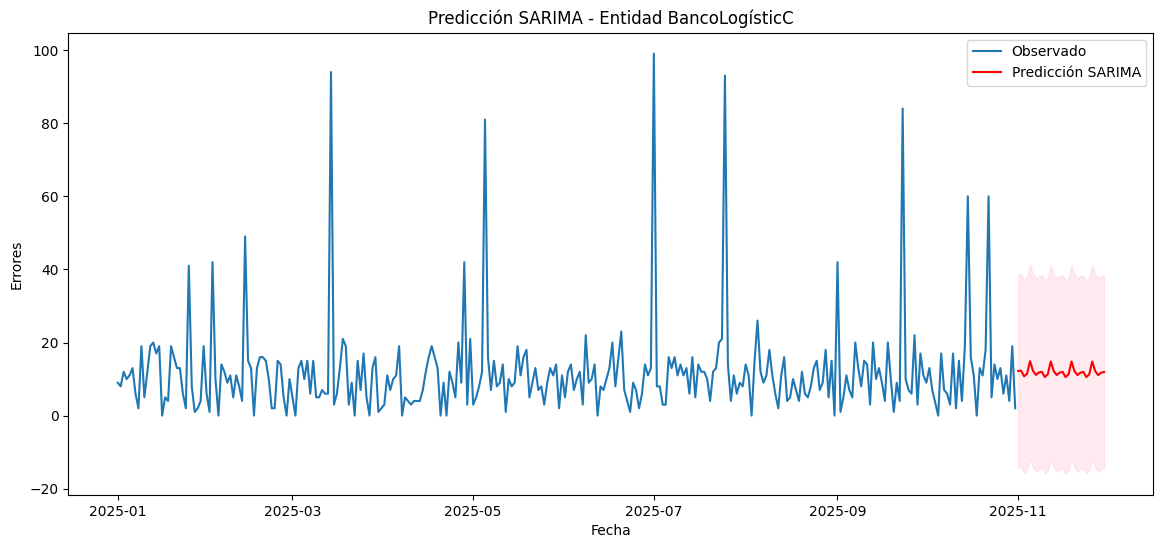

20:52:42 - cmdstanpy - INFO - Chain [1] start processing
20:52:42 - cmdstanpy - INFO - Chain [1] done processing



=== Procesando entidad BancoTransporF ===
Prophet:


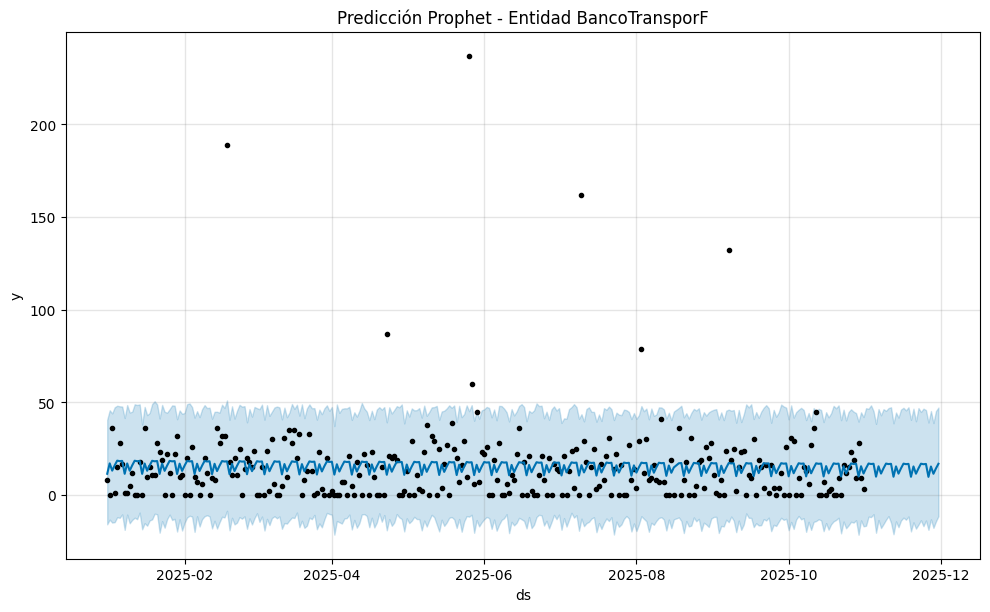

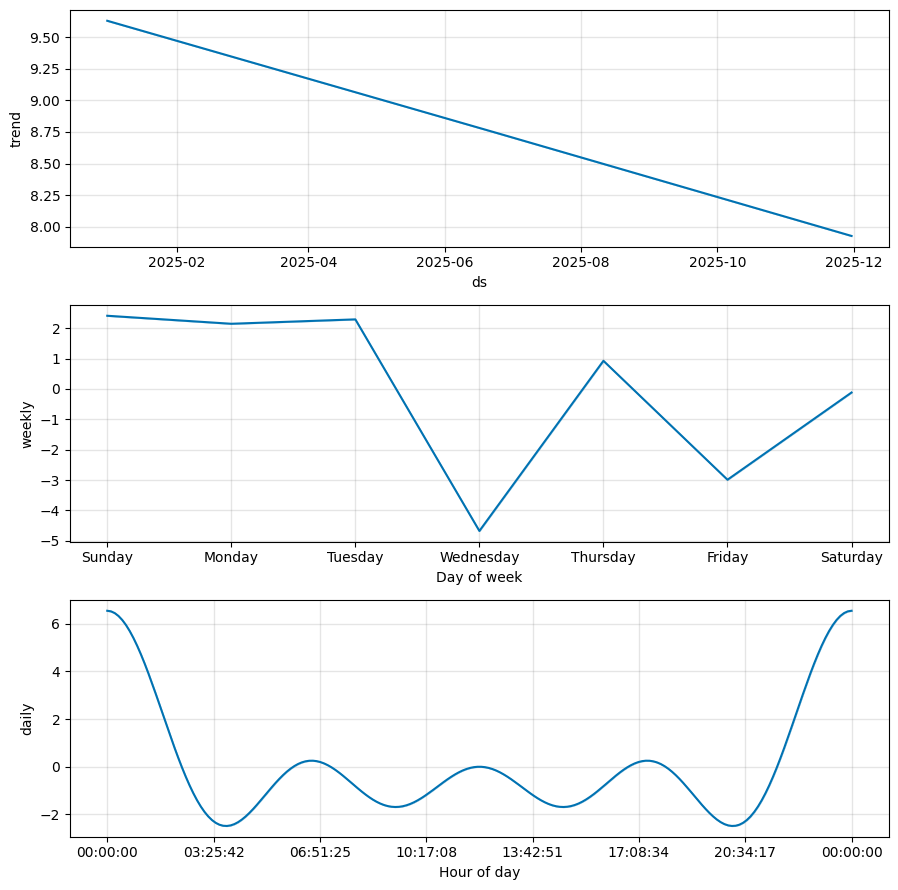

SARIMA:


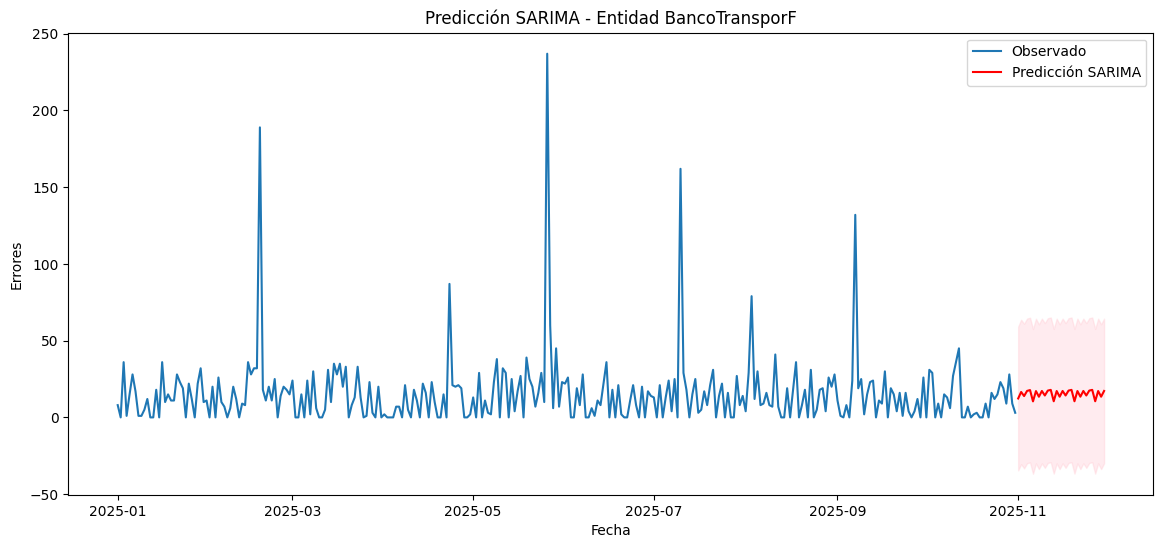

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import statsmodels.api as sm



# Función para preparar datos por entidad

def preparar_ts(df, entidad):
    ts = df[df['entidad'] == entidad].copy()
    ts = ts.sort_values('fecha')
    ts.reset_index(drop=True, inplace=True)
    return ts


# Predicción con Prophet

def prophet_pred(ts, dias_futuro=30):
    ts_prophet = ts[['fecha','errores']].rename(columns={'fecha':'ds','errores':'y'})
    model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)
    model.fit(ts_prophet)
    future = model.make_future_dataframe(periods=dias_futuro)
    forecast = model.predict(future)
    
    # Graficar
    model.plot(forecast)
    plt.title(f'Predicción Prophet - Entidad {ts["entidad"].iloc[0]}')
    plt.show()
    
    model.plot_components(forecast)
    plt.show()
    
    return forecast


#  Predicción con SARIMA

def sarima_pred(ts, dias_futuro=30, order=(1,0,1), seasonal_order=(1,1,1,7)):
    sarima_model = sm.tsa.statespace.SARIMAX(ts['errores'],
                                             order=order,
                                             seasonal_order=seasonal_order,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
    sarima_result = sarima_model.fit(disp=False)
    
    pred = sarima_result.get_forecast(steps=dias_futuro)
    pred_ci = pred.conf_int()
    
    # Graficar
    plt.figure(figsize=(14,6))
    plt.plot(ts['fecha'], ts['errores'], label='Observado')
    plt.plot(pd.date_range(ts['fecha'].iloc[-1]+pd.Timedelta(days=1), periods=dias_futuro),
             pred.predicted_mean, label='Predicción SARIMA', color='red')
    plt.fill_between(pd.date_range(ts['fecha'].iloc[-1]+pd.Timedelta(days=1), periods=dias_futuro),
                     pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
    plt.title(f'Predicción SARIMA - Entidad {ts["entidad"].iloc[0]}')
    plt.xlabel('Fecha')
    plt.ylabel('Errores')
    plt.legend()
    plt.show()
    
    return pred, pred_ci


#  Ejecutar pipeline para algunas entidades de ejemplo

entidades_ejemplo = ['BancoMinería A', 'BancoLogísticC', 'BancoTransporF']  # entidades a analizar 

for e in entidades_ejemplo:
    print(f'\n=== Procesando entidad {e} ===')
    ts_ent = preparar_ts(agg_diario, e)
    
    print('Prophet:')
    forecast_prophet = prophet_pred(ts_ent, dias_futuro=30)
    
    print('SARIMA:')
    pred_sarima, pred_ci_sarima = sarima_pred(ts_ent, dias_futuro=30)


In [17]:
forecast 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-01-01,239.440957,-166.268696,521.982380,239.440957,239.440957,-50.732887,-50.732887,-50.732887,-13.810337,-13.810337,-13.810337,-36.922550,-36.922550,-36.922550,0.0,0.0,0.0,188.708070
1,2025-01-02,239.445215,-62.250266,579.885569,239.445215,239.445215,26.202419,26.202419,26.202419,-13.810337,-13.810337,-13.810337,40.012756,40.012756,40.012756,0.0,0.0,0.0,265.647634
2,2025-01-03,239.449473,-87.082612,538.004124,239.449473,239.449473,-16.609003,-16.609003,-16.609003,-13.810337,-13.810337,-13.810337,-2.798665,-2.798665,-2.798665,0.0,0.0,0.0,222.840470
3,2025-01-04,239.453731,-50.193199,578.098393,239.453731,239.453731,32.625477,32.625477,32.625477,-13.810337,-13.810337,-13.810337,46.435814,46.435814,46.435814,0.0,0.0,0.0,272.079208
4,2025-01-05,239.457989,-95.148999,556.952150,239.457989,239.457989,-7.154154,-7.154154,-7.154154,-13.810337,-13.810337,-13.810337,6.656183,6.656183,6.656183,0.0,0.0,0.0,232.303834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2025-11-26,238.197284,-160.527732,511.850320,238.176617,238.220147,-50.732887,-50.732887,-50.732887,-13.810337,-13.810337,-13.810337,-36.922550,-36.922550,-36.922550,0.0,0.0,0.0,187.464397
330,2025-11-27,238.183475,-78.439776,629.826589,238.160755,238.206926,26.202419,26.202419,26.202419,-13.810337,-13.810337,-13.810337,40.012756,40.012756,40.012756,0.0,0.0,0.0,264.385893
331,2025-11-28,238.169666,-95.992094,558.485978,238.145425,238.195056,-16.609003,-16.609003,-16.609003,-13.810337,-13.810337,-13.810337,-2.798665,-2.798665,-2.798665,0.0,0.0,0.0,221.560663
332,2025-11-29,238.155856,-33.852765,594.772706,238.130259,238.182928,32.625477,32.625477,32.625477,-13.810337,-13.810337,-13.810337,46.435814,46.435814,46.435814,0.0,0.0,0.0,270.781333


#### Predicciones masivas, todas las entidades

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import statsmodels.api as sm


# ORDENAR ENTIDADES


entidades = sorted(agg_diario['entidad'].unique())

print(f"Total de entidades a procesar: {len(entidades)}")


# DATAFRAMES DE SALIDA PARA CSV

prophet_resultados = []
sarima_resultados = []


# RECORRER TODAS LAS ENTIDADES Y MODELAR 

for entidad in entidades:
    
    print(f"\nProcesando entidad {entidad}...")

    ts = agg_diario[agg_diario['entidad'] == entidad].copy()
    ts = ts.sort_values('fecha')
    ts.reset_index(drop=True, inplace=True)

    # ----------------------
    # PROPHET
    # ----------------------
    ts_p = ts.rename(columns={'fecha': 'ds', 'errores': 'y'})[['ds','y']]

    model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=False
    )
    
    try:
        model.fit(ts_p)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)

        forecast['entidad'] = entidad
        prophet_resultados.append(
            forecast[['ds','yhat','yhat_lower','yhat_upper','entidad']]
        )

    except Exception as e:
        print(f"⚠ Error en Prophet para entidad {entidad}: {e}")
        continue

    # ----------------------
    # SARIMA
    # ----------------------
    try:
        sarima_model = sm.tsa.statespace.SARIMAX(
            ts['errores'],
            order=(1,0,1),
            seasonal_order=(1,1,1,7),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        sarima_result = sarima_model.fit(disp=False)
        pred = sarima_result.get_forecast(steps=30)
        pred_ci = pred.conf_int()

        fechas_futuras = pd.date_range(
            ts['fecha'].iloc[-1] + pd.Timedelta(days=1),
            periods=30
        )

        df_sarima = pd.DataFrame({
            'ds': fechas_futuras,
            'sarima_pred': pred.predicted_mean.values,
            'sarima_lower': pred_ci.iloc[:,0].values,
            'sarima_upper': pred_ci.iloc[:,1].values,
            'entidad': entidad
        })

        sarima_resultados.append(df_sarima)

    except Exception as e:
        print(f"⚠ Error en SARIMA para entidad {entidad}: {e}")
        continue



# EXPORTAR RESULTADOS A CSV

df_prophet = pd.concat(prophet_resultados, ignore_index=True)
df_sarima = pd.concat(sarima_resultados, ignore_index=True)

df_prophet.to_csv("product/predicciones_prophet.csv", index=False)
df_sarima.to_csv("product/predicciones_sarima.csv", index=False)

print("\n📁 Archivos generados:")
print("- predicciones_prophet.csv")
print("- predicciones_sarima.csv")

